Importing data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os

Importing CSVs

In [5]:
x_train=pd.read_csv(r'G:\Projects\Ground Water Level Estimator - Group Project\dataset\cleanedData\x_train.csv')
x_train.head()

,state_code,district_code,latitude,longitude,basin,sub_basin,level_diff,month,season_Monsoon,season_Post-Monsoon,season_Summer,season_Winter
0,6,68,29.97361,76.82778,Indus (Up To Border),Ghaghar And Others,3.10,3,0.0,0.0,1.0,0.0
1,21,355,20.32778,86.08583,Mahanadi,Mahanadi Lower,0.23,1,0.0,0.0,0.0,1.0
2,8,112,25.66667,74.01667,Ganga,Banas,0.80,11,0.0,1.0,0.0,0.0
3,29,524,16.53972,75.32972,Krishna,Krishna Upper,3.83,5,0.0,0.0,1.0,0.0
4,29,546,16.05000,77.21389,Krishna,Tungabhadra Lower,2.20,8,1.0,0.0,0.0,0.0


In [6]:
x_test=pd.read_csv(r'G:\Projects\Ground Water Level Estimator - Group Project\dataset\cleanedData\x_test.csv')
x_test.head()

,state_code,district_code,latitude,longitude,basin,sub_basin,level_diff,month,season_Monsoon,season_Post-Monsoon,season_Summer,season_Winter
0,36,507,17.38333,78.52083,Krishna,Krishna Lower,1.44,5,0.0,0.0,1.0,0.0
1,23,409,22.40750,77.84278,Narmada,Narmada Upper,0.52,1,0.0,0.0,0.0,1.0
2,23,416,24.14833,75.02917,Ganga,Chambal Upper,10.04,5,0.0,0.0,1.0,0.0
3,19,305,23.40000,86.97361,Ganga,Damodar,2.31,1,0.0,0.0,0.0,1.0
4,33,568,13.02500,80.25833,East Flowing Rivers Between Pennar And Kanyaku...,Palar And Other,-0.13,11,0.0,1.0,0.0,0.0


In [7]:
y_train=pd.read_csv(r'G:\Projects\Ground Water Level Estimator - Group Project\dataset\cleanedData\y_train.csv')
y_train.head()

,currentlevel
0,36.40
1,1.33
2,2.10
3,7.13
4,12.20


In [8]:
y_test=pd.read_csv(r'G:\Projects\Ground Water Level Estimator - Group Project\dataset\cleanedData\y_test.csv')
y_test.head()

,currentlevel
0,7.02
1,2.23
2,19.14
3,10.45
4,2.53


Shape Ideas

In [9]:
x_train.shape,x_test.shape

((440680, 12), (110170, 12))

In [10]:
y_train.shape,y_test.shape

((440680, 1), (110170, 1))

Describing

In [11]:
x_train.describe()

,state_code,district_code,latitude,longitude,level_diff,month,season_Monsoon,season_Post-Monsoon,season_Summer,season_Winter
count,440680.000000,440680.000000,440680.000000,440680.000000,440680.000000,440680.000000,440680.000000,440680.000000,440680.000000,440680.000000
mean,22.558004,397.033970,20.150001,79.306261,0.020212,6.149224,0.238284,0.250202,0.226697,0.284817
std,9.198099,169.356958,6.205204,4.764904,5.782382,3.804822,0.426034,0.433130,0.418696,0.451328
min,1.000000,1.000000,8.083330,68.675000,-276.580000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,312.000000,14.898957,75.995830,-1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,433.000000,21.345830,78.166670,0.300000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,535.000000,24.470560,82.230560,1.550000,10.000000,0.000000,1.000000,0.000000,1.000000
max,38.000000,704.000000,33.741110,96.133330,216.400000,12.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
scaler=StandardScaler()

Preprocessing: Clean Up y_train and y_test Shape

In [13]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

Feature Scaling
- Use a ColumnTransformer to scale only numeric features,not one-hot encoded ones like season_Winter

In [14]:


numeric_features = ['state_code', 'district_code', 'latitude', 'longitude', 'level_diff', 'month']
categorical_features = ['basin', 'sub_basin']  # <-- These were causing issues

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)


Train Multiple Regressors in a Loop

In [15]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# models = {
#     "LinearRegression": LinearRegression(),
#     "LassoCV": LassoCV(cv=5),
#     "RidgeCV": RidgeCV(cv=5),
#     "ElasticNetCV": ElasticNetCV(cv=5),
#     "SVR": SVR(),
#     "KNN": KNeighborsRegressor(),
#     "DecisionTree": DecisionTreeRegressor(),
#     "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
#     "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
#     "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
# }

# results = []

# for name, model in models.items():
#     model.fit(x_train_processed, y_train)
#     y_pred = model.predict(x_test_processed)

#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     n, p = x_test.shape
#     adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

#     results.append({
#         'Model': name,
#         'MSE': mse,
#         'MAE': mae,
#         'R2': r2,
#         'Adjusted R2': adj_r2
#     })


In [16]:
# %%
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train_processed, y_train)

# Predict on test data
y_pred = xgb_model.predict(x_test_processed)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n, p = x_test_processed.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print(f"XGBoost Evaluation Metrics:")
print(f"  R² Score     : {r2:.4f}")
print(f"  Adjusted R²  : {adj_r2:.4f}")
print(f"  MAE          : {mae:.4f}")
print(f"  MSE          : {mse:.4f}")

# Save the trained model
save_path = r"G:\Projects\Ground Water Level Estimator - Group Project\models\trained_model\\"
os.makedirs(save_path, exist_ok=True)
joblib.dump(xgb_model, os.path.join(save_path, "xgb_model.pkl"))
print(f"✅ Model saved as '{os.path.join(save_path, 'xgb_model.pkl')}'")

# Store results in a dictionary for further visualization
results = [{
    'Model': 'XGBoost',
    'R2': r2,
    'Adjusted R2': adj_r2,
    'MAE': mae,
    'MSE': mse
}]



XGBoost Evaluation Metrics:
  R² Score     : 0.7374
  Adjusted R²  : 0.7371
  MAE          : 2.9556
  MSE          : 30.1799
✅ Model saved as 'G:\Projects\Ground Water Level Estimator - Group Project\models\trained_model\\xgb_model.pkl'


Display Results

In [21]:
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
results_df.style.background_gradient(cmap='YlGnBu')

,Model,R2,Adjusted R2,MAE,MSE
0,XGBoost,0.737414,0.737121,2.955639,30.179876


Recording Data

✅ Model metrics saved to 'model_metrics.csv'


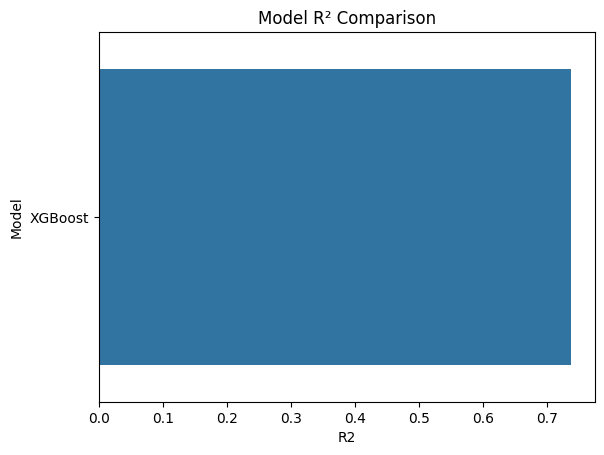

In [23]:
# Sort results and create styled DataFrame
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
results_df.style.background_gradient(cmap='YlGnBu')

# Define and create save path
save_results = r"G:\Projects\Ground Water Level Estimator - Group Project\models\results\\"
os.makedirs(save_results, exist_ok=True)

# Save as CSV
results_df.to_csv(os.path.join(save_results, "model_metrics.csv"), index=False)

print("✅ Model metrics saved to 'model_metrics.csv'")


sns.barplot(x='R2', y='Model', data=results_df)
joblib.dump(preprocessor, os.path.join(save_path, "xgb_preprocessor.pkl"))

plt.title("Model R² Comparison")
plt.show()


Visual Comparison of Model Performance

C:\Users\Neelaksh\AppData\Local\Temp\ipykernel_16724\76612517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')


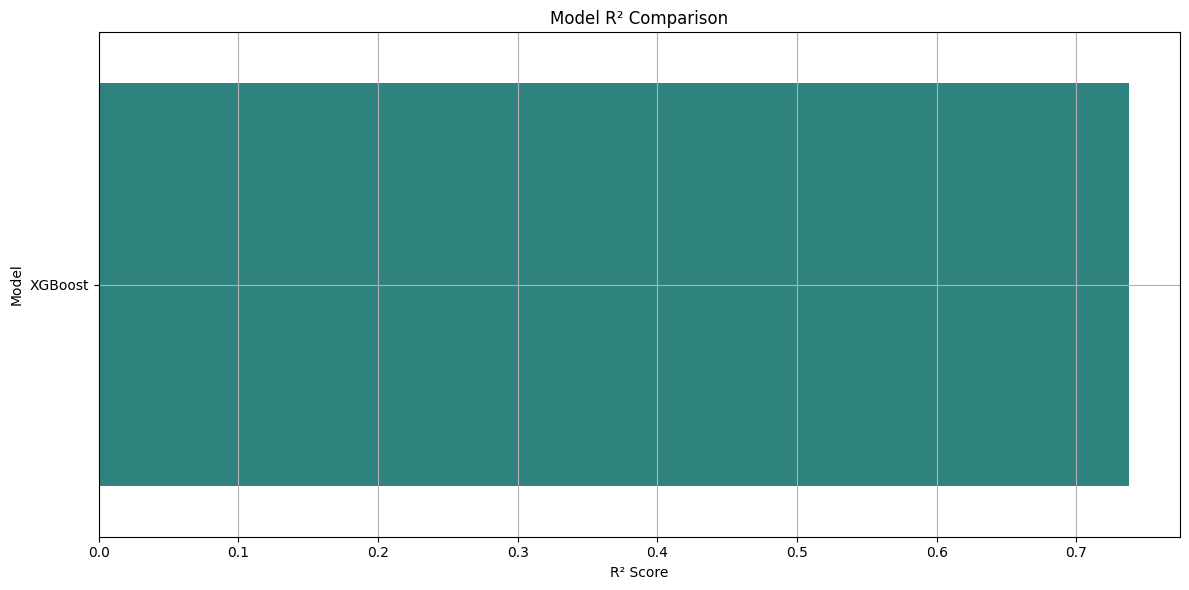

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')
plt.title('Model R² Comparison')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()

Testing Model

In [25]:
# Select a sample from test data
sample = x_test.iloc[0:1]
sample_processed = preprocessor.transform(sample)

# Predict
predicted_level = xgb_model.predict(sample_processed)
actual_level = y_test.iloc[0]

# Calculate percent error
percent_error = abs((predicted_level[0] - actual_level) / actual_level) * 100

# Display
print(f"Predicted: {predicted_level[0]:.2f} m")
print(f"Actual   : {actual_level:.2f} m")
print(f"Percent Error: {percent_error:.2f}%")


Predicted: 9.13 m
Actual   : 7.02 m
Percent Error: 30.11%


Prediction Error Scale

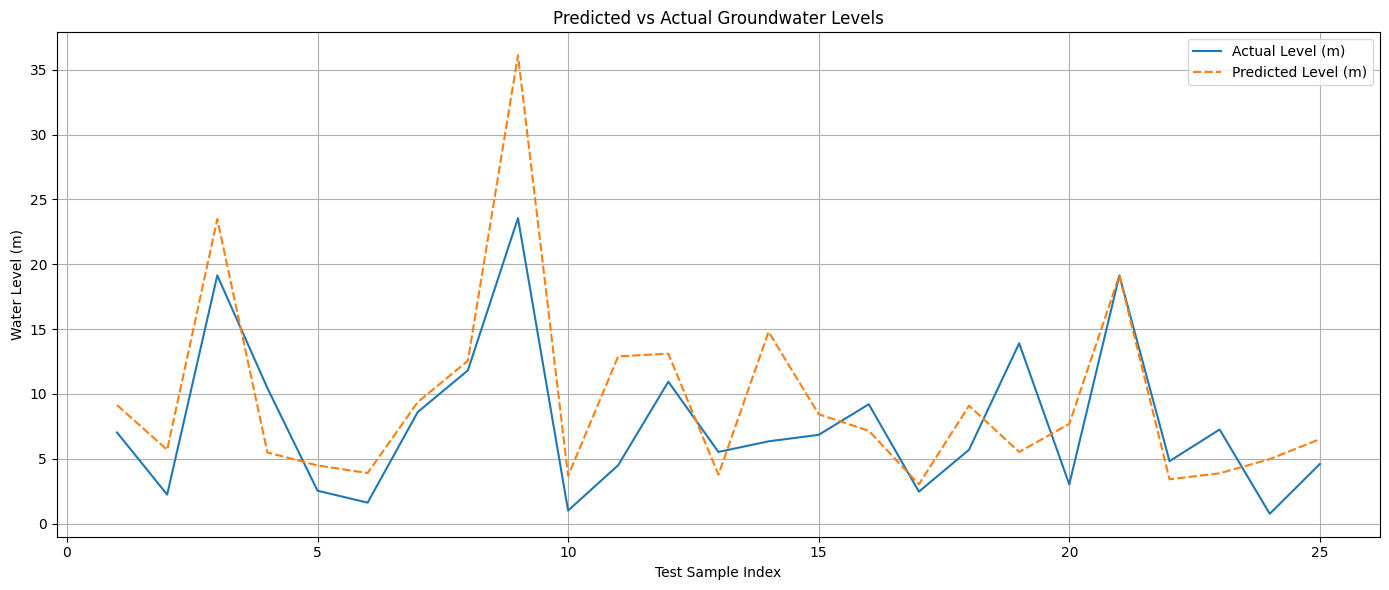

In [26]:
# Choose first N samples to visualize
N = 25  # change this if needed
samples = x_test.iloc[:N]
actual_values = y_test.iloc[:N].values
predicted_values = xgb_model.predict(preprocessor.transform(samples))

# Create DataFrame for plotting
comparison_df = pd.DataFrame({
    'Sample': range(1, N + 1),
    'Actual Level (m)': actual_values,
    'Predicted Level (m)': predicted_values
})

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=comparison_df.set_index('Sample'))
plt.title('Predicted vs Actual Groundwater Levels')
plt.ylabel('Water Level (m)')
plt.xlabel('Test Sample Index')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()